In [216]:
import os
import sys
import pickle

current_dir =  os.getcwd()
#parent_dir = os.path.dirname(current_dir)
#sys.path.insert(0, parent_dir)

grandparent_dir = os.path.dirname(os.path.dirname(current_dir))
sys.path.insert(0, grandparent_dir)


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt

In [217]:
from cities.utils.data_grabber import DataGrabber
data = DataGrabber()
data.get_features_wide(["gdp", "population", "transport",
            "spending_transportation", "spending_commerce", "spending_HHS"])
gdp = data.wide['gdp']
# population = data.wide['population']
# trnasport = data.wide['transport']
# spending_transportation = data.wide['spending_transportation']
# spending_commerce = data.wide['spending_commerce']
# spending_HHS = data.wide['spending_HHS']


In [218]:
def tableInfo(tableName):

    print(tableName.head())
    print(tableName.dtypes)
    print(f'Number of rows: {tableName.shape[0]}')
    print(f'Unique FIPS numbers {tableName['GeoFIPS'].nunique()}')

In [219]:
ethnic_composition = pd.read_csv(f"{grandparent_dir}/data/raw/ACSDP5Y2021_DP05_Race.csv")

#tableInfo(ethnic_composition)

# repair FIPS codes
# extract columns and rename them

In [220]:
missing_values = ethnic_composition.isna().sum()
missing_values

GEO_ID            0
NAME              0
DP05_0070E        0
DP05_0070M        0
DP05_0070MA     126
               ... 
DP05_0084EA    3221
DP05_0085E        0
DP05_0085M        0
DP05_0085MA    3221
DP05_0085EA    3221
Length: 66, dtype: int64

In [221]:
ethnic_composition = ethnic_composition.iloc[1:]
missing_values = ethnic_composition['GEO_ID'].isna()

# Count the number of missing values
count_missing = missing_values.sum()
count_missing

0

In [222]:
ethnic_composition['GEO_ID'] = ethnic_composition['GEO_ID'].str.split('US').str[1]
ethnic_composition['GEO_ID']  = ethnic_composition['GEO_ID'].astype('int64')
ethnic_composition = ethnic_composition.rename(columns={'GEO_ID': 'GeoFIPS'})


In [223]:
ethnic_composition = ethnic_composition[['GeoFIPS'] + [col for col in ethnic_composition.columns if col.endswith('E')]]
ethnic_composition = ethnic_composition.drop(columns=['NAME'])

In [224]:

common_fips = np.intersect1d(
    gdp["GeoFIPS"].unique(), ethnic_composition["GeoFIPS"].unique()
)
len(common_fips)

all_FIPS_ethnic_composition = ethnic_composition.copy()

ethnic_composition = ethnic_composition[
    ethnic_composition["GeoFIPS"].isin(common_fips)
    ] 

In [225]:
missing_values = ethnic_composition.isna().sum()
missing_values

GeoFIPS       0
DP05_0070E    0
DP05_0071E    0
DP05_0072E    0
DP05_0073E    0
DP05_0074E    0
DP05_0075E    0
DP05_0076E    0
DP05_0077E    0
DP05_0078E    0
DP05_0079E    0
DP05_0080E    0
DP05_0081E    0
DP05_0082E    0
DP05_0083E    0
DP05_0084E    0
DP05_0085E    0
dtype: int64

In [226]:
# adding geonames (LAST COLUMN!)
ethnic_composition = ethnic_composition.merge(
        gdp[["GeoFIPS", "GeoName"]], on="GeoFIPS", how="left"
    )

In [227]:
ethnic_composition = ethnic_composition[['GeoFIPS', 'GeoName', 'DP05_0070E', 'DP05_0072E',
                                   'DP05_0073E', 'DP05_0074E', 'DP05_0075E', 'DP05_0077E',
                                   'DP05_0078E', 'DP05_0079E', 'DP05_0080E', 'DP05_0081E',
                                   'DP05_0082E']]


In [228]:
ethnic_composition.columns = ['GeoFIPS', 'GeoName', 'total_pop', 'mexican', 'puerto_rican',
                        'cuban', 'other_hispanic_latino', 'white', 'black_african_american',
                        'american_indian_alaska_native', 'asian',
                        'native_hawaiian_other_pacific_islander', 'other_race']
ethnic_composition = ethnic_composition.sort_values(by=["GeoFIPS", "GeoName"])


In [229]:
ethnic_composition.iloc[:, 2:] = ethnic_composition.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
ethnic_composition[ethnic_composition.columns[2:]] = ethnic_composition[ethnic_composition.columns[2:]].astype(float)




In [230]:
ethnic_composition

,GeoFIPS,GeoName,total_pop,mexican,puerto_rican,cuban,other_hispanic_latino,white,black_african_american,american_indian_alaska_native,asian,native_hawaiian_other_pacific_islander,other_race
0,1001,"Autauga, AL",58239.0,881.0,508.0,194.0,192.0,42571.0,11464.0,98.0,647.0,0.0,109.0
1,1003,"Baldwin, AL",227131.0,5835.0,1064.0,615.0,3120.0,187548.0,19749.0,1076.0,2175.0,9.0,959.0
2,1005,"Barbour, AL",25259.0,932.0,77.0,0.0,167.0,11268.0,11934.0,71.0,106.0,1.0,229.0
3,1007,"Bibb, AL",22412.0,244.0,229.0,25.0,136.0,16596.0,4905.0,21.0,46.0,0.0,18.0
4,1009,"Blount, AL",58884.0,4970.0,85.0,51.0,506.0,50595.0,746.0,70.0,216.0,74.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,56037,"Sweetwater, WY",42459.0,5478.0,74.0,6.0,1275.0,33243.0,479.0,454.0,448.0,14.0,160.0
3078,56039,"Teton, WY",23319.0,2879.0,57.0,0.0,548.0,18638.0,166.0,30.0,369.0,15.0,154.0
3079,56041,"Uinta, WY",20514.0,1553.0,4.0,64.0,360.0,17853.0,52.0,20.0,37.0,0.0,0.0
3080,56043,"Washakie, WY",7768.0,1043.0,26.0,0.0,48.0,6342.0,1.0,38.0,31.0,0.0,32.0


GeoFIPS                                   0
GeoName                                   0
total_pop                                 0
mexican                                   0
puerto_rican                              0
cuban                                     0
other_hispanic_latino                     0
white                                     0
black_african_american                    0
american_indian_alaska_native             0
asian                                     0
native_hawaiian_other_pacific_islander    0
other_race                                0
dtype: int64

In [126]:
ethnic_composition_long = pd.melt(
    ethnic_composition,
    id_vars=["GeoFIPS", "GeoName"],
    var_name="Category",
    value_name="Value",
)

ethnic_composition_long

,GeoFIPS,GeoName,Category,Value
0,1001,"Autauga, AL",total_pop,58239
1,1003,"Baldwin, AL",total_pop,227131
2,1005,"Barbour, AL",total_pop,25259
3,1007,"Bibb, AL",total_pop,22412
4,1009,"Blount, AL",total_pop,58884
...,...,...,...,...
33897,56037,"Sweetwater, WY",other_race,160
33898,56039,"Teton, WY",other_race,154
33899,56041,"Uinta, WY",other_race,0
33900,56043,"Washakie, WY",other_race,32


In [231]:
# Assuming you have a DataFrame named 'ethnic_composition'
# Sum the values by row across columns starting from the 4th column
ethnic_composition['totalALT'] = ethnic_composition.iloc[:, 3:].sum(axis=1)




In [241]:
sumNOT = 56464 + 1575 + 1775 
sumNOT - 1575

58239

In [245]:
# some other race alone + two or more races = otherRace(races)

58239

In [233]:
ethnic_composition.iloc[:, 3:]

,mexican,puerto_rican,cuban,other_hispanic_latino,white,black_african_american,american_indian_alaska_native,asian,native_hawaiian_other_pacific_islander,other_race,totalALT
0,881.0,508.0,194.0,192.0,42571.0,11464.0,98.0,647.0,0.0,109.0,56664.0
1,5835.0,1064.0,615.0,3120.0,187548.0,19749.0,1076.0,2175.0,9.0,959.0,222150.0
2,932.0,77.0,0.0,167.0,11268.0,11934.0,71.0,106.0,1.0,229.0,24785.0
3,244.0,229.0,25.0,136.0,16596.0,4905.0,21.0,46.0,0.0,18.0,22220.0
4,4970.0,85.0,51.0,506.0,50595.0,746.0,70.0,216.0,74.0,92.0,57405.0
...,...,...,...,...,...,...,...,...,...,...,...
3077,5478.0,74.0,6.0,1275.0,33243.0,479.0,454.0,448.0,14.0,160.0,41631.0
3078,2879.0,57.0,0.0,548.0,18638.0,166.0,30.0,369.0,15.0,154.0,22856.0
3079,1553.0,4.0,64.0,360.0,17853.0,52.0,20.0,37.0,0.0,0.0,19943.0
3080,1043.0,26.0,0.0,48.0,6342.0,1.0,38.0,31.0,0.0,32.0,7561.0


In [134]:
ethnic_composition.iloc[:, 4:]

,puerto_rican,cuban,other_hispanic_latino,white,black_african_american,american_indian_alaska_native,asian,native_hawaiian_other_pacific_islander,other_race,totalALT
0,508,194,192,42571,11464,98,647,0,109,5081941924257111464986470109508194192425711146...
1,1064,615,3120,187548,19749,1076,2175,9,959,1064615312018754819749107621759959106461531201...
2,77,0,167,11268,11934,71,106,1,229,7701671126811934711061229770167112681193471106...
3,229,25,136,16596,4905,21,46,0,18,2292513616596490521460182292513616596490521460...
4,85,51,506,50595,746,70,216,74,92,8551506505957467021674928551506505957467021674...
...,...,...,...,...,...,...,...,...,...,...
3077,74,6,1275,33243,479,454,448,14,160,7461275332434794544481416074612753324347945444...
3078,57,0,548,18638,166,30,369,15,154,5705481863816630369151545705481863816630369151...
3079,4,64,360,17853,52,20,37,0,0,4643601785352203700464360178535220370046436017...
3080,26,0,48,6342,1,38,31,0,32,2604863421383103226048634213831032260486342138...


In [24]:
spending_HHS = pd.read_csv(f"{grandparent_dir}/data/raw/spending_HHS.csv")
tableInfo(spending_HHS)

   year  GeoFIPS  total_obligated_amount
0  2015     1003              18472412.3
1  2015     1007              87212508.0
2  2015     1015              32668876.0
3  2015     1031                 23047.0
4  2015     1039               1124060.0
year                        int64
GeoFIPS                     int64
total_obligated_amount    float64
dtype: object
Number of rows: 22025
Unique FIPS numbers 2429


In [4]:
spending_transportation_long

NameError: name 'spending_transportation_long' is not defined

In [18]:
spending_transportation_wide = pd.read_csv(f"{grandparent_dir}/data/processed/spending_transportation_wide.csv")
spending_gdp_wide = pd.read_csv(f"{grandparent_dir}/data/processed/spending_gdp_wide.csv")
spending_transportation_wide = pd.read_csv(f"{grandparent_dir}/data/processed/spending_transportation_wide.csv")
spending_transportation_wide = pd.read_csv(f"{grandparent_dir}/data/processed/spending_transportation_wide.csv")


In [19]:
spending_transportation_wide

,GeoFIPS,GeoName,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1001,"Autauga, AL",0.0,1608527.0,134913.0,408157.0,218474.0,570771.0,171690.0,710464.0,133883.0,279069.0,1441835.00,1043883.0
1,1003,"Baldwin, AL",0.0,2234832.0,1991754.0,5544327.0,4591277.0,6552763.0,11057854.0,2721654.0,6981853.0,1874950.0,16738683.00,3101908.0
2,1005,"Barbour, AL",0.0,744823.0,340481.0,663434.0,1078754.0,635047.0,134934.0,1302681.0,134934.0,2101428.0,2108168.00,45000.0
3,1007,"Bibb, AL",0.0,229466.0,0.0,21343.0,127685.0,0.0,0.0,220983.0,271982.0,909762.0,556579.00,31000.0
4,1009,"Blount, AL",0.0,169079.0,0.0,458903.0,532131.0,284669.0,323345.0,0.0,412584.0,627498.0,449828.00,132536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,56037,"Sweetwater, WY",0.0,1491747.0,4087377.0,2075371.0,5745210.0,1320159.0,6003024.0,6473548.0,4470161.0,5082105.0,4318021.00,21036077.0
3078,56039,"Teton, WY",0.0,20886304.0,2279290.0,21058654.0,4161516.0,9076887.0,10097530.0,6943324.0,11896702.0,13816983.0,68584596.81,30323972.0
3079,56041,"Uinta, WY",0.0,369556.0,354122.0,868660.0,581576.0,386768.0,492036.0,508245.0,964339.0,0.0,1057523.00,9346523.0
3080,56043,"Washakie, WY",0.0,0.0,277826.0,349407.0,319224.0,0.0,599896.0,690753.0,276532.0,358642.0,1014354.00,45000.0


In [16]:
unique_gdp = gdp[['GeoFIPS', 'GeoName']].drop_duplicates(subset=['GeoFIPS', 'GeoName'], keep='first')
exclude_geofips = set(spending_transportation_long['GeoFIPS'])
unique_gdp = unique_gdp[~unique_gdp['GeoFIPS'].isin(exclude_geofips)]

unique_gdp['year'] = np.repeat(2018, unique_gdp.shape[0])
unique_gdp['total_obligated_amount'] = np.repeat(0, unique_gdp.shape[0])
concatenated_df = pd.concat([spending_transportation_long, unique_gdp], ignore_index=True)
concatenated_df = concatenated_df.sort_values(by=['GeoFIPS', 'GeoName', 'year'])

assert concatenated_df['GeoFIPS'].nunique() == concatenated_df['GeoName'].nunique()
assert concatenated_df['GeoFIPS'].nunique() == gdp['GeoFIPS'].nunique()
concatenated_df

,GeoFIPS,GeoName,year,total_obligated_amount
0,1001,"Autauga, AL",2011,1608527.0
1,1001,"Autauga, AL",2012,134913.0
2,1001,"Autauga, AL",2013,408157.0
3,1001,"Autauga, AL",2014,218474.0
4,1001,"Autauga, AL",2015,570771.0
...,...,...,...,...
15815,56045,"Weston, WY",2017,3620208.0
15816,56045,"Weston, WY",2018,240001.0
15817,56045,"Weston, WY",2019,436856.0
15818,56045,"Weston, WY",2020,280005.0


,GeoFIPS,GeoName,year,total_obligated_amount
0,1001,"Autauga, AL",2011,1608527.0
1,1001,"Autauga, AL",2012,134913.0
2,1001,"Autauga, AL",2013,408157.0
3,1001,"Autauga, AL",2014,218474.0
4,1001,"Autauga, AL",2015,570771.0
...,...,...,...,...
15815,56045,"Weston, WY",2017,3620208.0
15816,56045,"Weston, WY",2018,240001.0
15817,56045,"Weston, WY",2019,436856.0
15818,56045,"Weston, WY",2020,280005.0


In [25]:

transportUnwanted = spending_HHS[(pd.isna(spending_HHS['total_obligated_amount']) | 
                            (spending_HHS['total_obligated_amount'] == 1) |
                            (spending_HHS['total_obligated_amount'] == 0))] 

exclude_mask = spending_HHS['total_obligated_amount'].isin(transportUnwanted['total_obligated_amount'])

spending_HHS = spending_HHS[~exclude_mask]  # 

assert spending_HHS.isna().sum().sum() == 0, 'Na values detected'

In [26]:
names_HHS = pd.read_csv(f"{grandparent_dir}/data/raw/spending_HHS_names.csv")

spending_only_fips = np.setdiff1d(spending_HHS['GeoFIPS'], transport['GeoFIPS'])

fips4_to_repair = [fip for fip in spending_only_fips if (fip < 10000 and fip > 999)]
short4_fips = spending_HHS[spending_HHS['GeoFIPS'].isin(fips4_to_repair)]

full_geofipsLIST = [fip for fip in spending_only_fips if fip > 9999]
full_geofips = spending_HHS[spending_HHS['GeoFIPS'].isin(full_geofipsLIST)]

cleaningLIST = [full_geofips, short4_fips] # no 3digit FIPS

In [27]:
for badFIPS in cleaningLIST:

    geofips_to_geonamealt = dict(zip(names_HHS['GeoFIPS'], names_HHS['GeoNameALT']))

    badFIPS['GeoNameALT'] = badFIPS['GeoFIPS'].map(geofips_to_geonamealt)
    badFIPS = badFIPS.rename(columns={'GeoFIPS': 'damagedFIPS'})

    badFIPSmapping_dict = dict(zip(transport['GeoName'], transport['GeoFIPS']))

    badFIPS['repairedFIPS'] = badFIPS['GeoNameALT'].apply(lambda x: badFIPSmapping_dict.get(x))
    repaired_geofips = badFIPS[badFIPS['repairedFIPS'].notna()]

    
    repair_ratio = (repaired_geofips.shape[0] / badFIPS.shape[0])
    print(f'Ratio of repaired FIPS: {round(repair_ratio, 2)}')
    
    #assert repair_ratio > 0.9, f'Less than 0.9 of FIPS were successfully repaired!'
    
    spending_HHS['GeoFIPS'] = spending_HHS['GeoFIPS'].replace(
    dict(zip(repaired_geofips['damagedFIPS'], repaired_geofips['repairedFIPS']))
)    

Ratio of repaired FIPS: 0.0
Ratio of repaired FIPS: 0.0


/tmp/ipykernel_3653/4067915231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badFIPS['GeoNameALT'] = badFIPS['GeoFIPS'].map(geofips_to_geonamealt)
/tmp/ipykernel_3653/4067915231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badFIPS['GeoNameALT'] = badFIPS['GeoFIPS'].map(geofips_to_geonamealt)


In [30]:
common_fips = np.intersect1d(transport['GeoFIPS'].unique(),
                            spending_HHS['GeoFIPS'].unique())

all_FIPS_spending_HHS = spending_HHS.copy()

spending_HHS = spending_HHS[spending_HHS["GeoFIPS"].isin(common_fips)] # 
assert spending_HHS.shape[0] / all_FIPS_spending_HHS.shape[0] > 0.9, 'Less than 0.9 of FIPS are common!'


In [33]:
spending_HHS = spending_HHS.groupby(['GeoFIPS', 'year'])['total_obligated_amount'].sum().reset_index()
spending_HHS.reset_index(drop=True, inplace=True)


# adding GeoNames
spending_HHS = spending_HHS.merge(transport[["GeoFIPS", "GeoName"]], on="GeoFIPS", how="left")[
        ["GeoFIPS", "GeoName", "year", "total_obligated_amount"]
        ]


In [37]:
from cities.utils.cleaning_utils import standardize_and_scale

spending_HHS_long = spending_HHS.copy()

spending_HHS_wide = spending_HHS.pivot_table(index=['GeoFIPS', 'GeoName'], columns='year',
                                            values='total_obligated_amount')
spending_HHS_wide.reset_index(inplace=True)
spending_HHS_wide.columns.name = None
spending_HHS_wide = spending_HHS_wide.fillna(0)

spending_HHS_std_long = standardize_and_scale(spending_HHS)
spending_HHS_std_wide = standardize_and_scale(spending_HHS_wide)


,GeoFIPS,GeoName,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1003,"Baldwin, AL",-0.962357,-0.985744,-0.981464,-0.982778,-0.976251,-0.987636,-0.978231,-0.976862,-0.983333,-0.981369,-0.993420,-0.997059
1,1007,"Bibb, AL",-1.000000,-1.000000,-0.989452,-0.950177,-0.956389,-0.941627,-0.945842,-0.951175,-0.926394,-0.902736,-0.910493,-0.930152
2,1009,"Blount, AL",-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999975
3,1013,"Butler, AL",-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999980
4,1015,"Calhoun, AL",-0.983518,-0.988217,-0.967009,-0.970636,-0.970470,-0.978134,-0.980327,-0.985856,-0.986613,-0.992584,-0.994951,-0.995139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,56033,"Sheridan, WY",-0.999771,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999320,-0.999872,-0.999975,-0.999989,-0.999982,-0.999764
2288,56037,"Sweetwater, WY",-0.992601,-0.997022,-0.992257,-0.995064,-0.992770,-0.989587,-0.983598,-0.989278,-0.995732,-0.992678,-0.993935,-0.994586
2289,56039,"Teton, WY",-0.991287,-0.996493,-0.995441,-0.995764,-0.988877,-0.996810,-0.991180,-0.993546,-0.993929,-0.993491,-0.993053,-0.997710
2290,56041,"Uinta, WY",-0.995215,-0.996268,-0.995148,-0.997345,-0.997676,-0.991352,-0.981857,-0.991123,-0.989070,-0.988129,-0.987167,-0.991451


In [12]:
common_fips = np.intersect1d(transport['GeoFIPS'].unique(),
                        spending_commerce['GeoFIPS'].unique())

all_FIPS_spending_commerce = spending_commerce.copy()

spending_commerce = spending_commerce[spending_commerce["GeoFIPS"].isin(common_fips)] # 0.96 of FIPS are common
assert spending_commerce.shape[0] / all_FIPS_spending_commerce.shape[0] > 0.9, 'Less than 0.9 of FIPS are common!'


In [23]:
spending_commerce = spending_commerce.groupby(['GeoFIPS', 'year'])['total_obligated_amount'].sum().reset_index()
spending_commerce.reset_index(drop=True, inplace=True)


# adding GeoNames
spending_commerce = spending_commerce.merge(transport[["GeoFIPS", "GeoName"]], on="GeoFIPS", how="left")[
        ["GeoFIPS", "GeoName", "year", "total_obligated_amount"]
    ]


In [24]:
spending_commerce

,GeoFIPS,GeoName,year,total_obligated_amount
0,1001,"Autauga, AL",2017,2364930.00
1,1003,"Baldwin, AL",2011,1274298.00
2,1003,"Baldwin, AL",2013,186580.00
3,1003,"Baldwin, AL",2014,105434.00
4,1003,"Baldwin, AL",2015,105434.00
...,...,...,...,...
8399,56033,"Sheridan, WY",2021,449841.85
8400,56035,"Sublette, WY",2011,43695.00
8401,56041,"Uinta, WY",2020,587500.00
8402,56045,"Weston, WY",2017,2056625.00


In [25]:

from cities.utils.cleaning_utils import standardize_and_scale

spending_commerce_long = spending_commerce.copy()

spending_commerce_wide = spending_commerce.pivot_table(index=['GeoFIPS', 'GeoName'], columns='year',
                                                values='total_obligated_amount')
spending_commerce_wide.reset_index(inplace=True)
spending_commerce_wide.columns.name = None
spending_commerce_wide = spending_commerce_wide.fillna(0)

spending_commerce_std_long = standardize_and_scale(spending_commerce)
spending_commerce_std_wide = standardize_and_scale(spending_commerce_wide)

In [5]:
# cleaning total_obligated_amount
# deleteting 0 and 1 values as they are not informative

transportUnwanted = spending_transportation[(pd.isna(spending_transportation['total_obligated_amount']) | 
                                (spending_transportation['total_obligated_amount'] == 1) |
                                (spending_transportation['total_obligated_amount'] == 0))] 
print(f' Number of values to remove: {transportUnwanted.shape[0]}')

exclude_mask = spending_transportation['total_obligated_amount'].isin(transportUnwanted['total_obligated_amount'])
spending_transportation = spending_transportation[~exclude_mask]

assert spending_transportation.isna().sum().sum() == 0, 'Na values detected'

tableInfo(spending_transportation)


 Number of values to remove: 66
   year  GeoFIPS  total_obligated_amount
0  2010       69             110719238.0
1  2010       93              13282813.0
2  2010      111             840055898.0
3  2010      153               1248153.0
4  2010      161              48428565.0
year                        int64
GeoFIPS                     int64
total_obligated_amount    float64
dtype: object
Number of rows: 16997
Unique FIPS numbers 3145


In [6]:
count_short_geofips = spending_transportation[spending_transportation['GeoFIPS'] <= 999]['GeoFIPS'].count()

# Print the count
print(count_short_geofips)

1115


In [23]:
# fiprs wrangling
common_fips = np.intersect1d(transport['GeoFIPS'].unique(),
                                spending_transportation['GeoFIPS'].unique())

short_geofips = spending_transportation[spending_transportation['GeoFIPS'].astype(str).str.len().between(1, 3)]
short_geofips_list = short_geofips['GeoFIPS'].tolist()

len(common_fips) # loss of over 1000 FIPS!!!

1853

In [8]:
len(spending_transportation['GeoFIPS'].unique())
len(transport['GeoFIPS'].unique())

3082

In [24]:
transport_only_fips = np.setdiff1d(transport['GeoFIPS'], spending_transportation['GeoFIPS'])
spending_only_fips = np.setdiff1d(spending_transportation['GeoFIPS'], transport['GeoFIPS'])
fips4_to_repair = [fip for fip in spending_only_fips if fip < 10000]
len(fips4_to_repair)

904

In [14]:
names_transportation = pd.read_csv(f"{grandparent_dir}/data/raw/spending_transportation_names.csv")

In [12]:
short_geofips = spending_transportation[spending_transportation['GeoFIPS'].astype(str).str.len().between(1, 3)]
short_geofips

,year,GeoFIPS,total_obligated_amount
0,2010,69,110719238.0
1,2010,93,13282813.0
2,2010,111,840055898.0
3,2010,153,1248153.0
4,2010,161,48428565.0
...,...,...,...
15900,2012,885,9908697.0
15901,2012,887,980676.0
15902,2012,889,615351.0
15903,2012,895,160187.0


In [15]:
geofips_to_geonamealt = dict(zip(names_transportation['GeoFIPS'], names_transportation['GeoNameALT']))

short_geofips['GeoNameALT'] = short_geofips['GeoFIPS'].map(geofips_to_geonamealt)
short_geofips = short_geofips.rename(columns={'GeoFIPS': 'damagedFIPS'})
short_geofips


C:\Users\nikod\AppData\Local\Temp\ipykernel_14896\4007564228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_geofips['GeoNameALT'] = short_geofips['GeoFIPS'].map(geofips_to_geonamealt)


,year,damagedFIPS,total_obligated_amount,GeoNameALT
0,2010,69,110719238.0,"Calaveras, CA"
1,2010,93,13282813.0,"Hartford, CT"
2,2010,111,840055898.0,"Washington, DC"
3,2010,153,1248153.0,"Honolulu, HI"
4,2010,161,48428565.0,"Geneva, AL"
...,...,...,...,...
15900,2012,885,9908697.0,"Montrose, CO"
15901,2012,887,980676.0,"Morgan, CO"
15902,2012,889,615351.0,"Otero, CO"
15903,2012,895,160187.0,"Phillips, CO"


In [20]:
short_geofipsmapping_dict = dict(zip(transport['GeoName'], transport['GeoFIPS']))

short_geofips['repairedFIPS'] = short_geofips['GeoNameALT'].apply(lambda x: short_geofipsmapping_dict.get(x))
repaired_geofips = short_geofips[short_geofips['repairedFIPS'].notna()]

assert (repaired_geofips.shape[0] / short_geofips.shape[0]) < 90, 'Less than 0.9 damaged FIPS were successfully repaired'
print(repaired_geofips.shape[0] / short_geofips.shape[0])

0.9587443946188341


In [ ]:
def find_exact_match(geoname, mapping_dict):
    return mapping_dict.get(geoname)

# Create a new column 'repairedFIPS' in short_geofips with exact matches
short_geofips['repairedFIPS'] = short_geofips['GeoNameALT'].apply(lambda x: mapping_dict.get(x))

# Create a new DataFrame with only the rows where FIPS codes were successfully repaired
repaired_geofips = short_geofips[short_geofips['repairedFIPS'].notna()]


In [ ]:
spending_transportation['GeoFIPS'] = spending_transportation['GeoFIPS'].replace(
    dict(zip(repaired_geofips['damagedFIPS'], repaired_geofips['repairedFIPS']))
)

# Print the updated spending_transportation DataFrame
tableInfo(spending_transportation)
count_short_geofips = spending_transportation[spending_transportation['GeoFIPS'] <= 999]['GeoFIPS'].count()
print(count_short_geofips)
assert count_short_geofips / spending_transportation.shape[0] < 0.05, 'More than 0.05 of FIPS are short and will be deleted!'

# deleting them
spending_transportation = spending_transportation[spending_transportation['GeoFIPS'] > 999]


In [55]:
# Repairing 4 digit FIPS (4 digit fips that are only in spending_transportation)

transport_only_fips = np.setdiff1d(transport['GeoFIPS'], spending_transportation['GeoFIPS'])
spending_only_fips = np.setdiff1d(spending_transportation['GeoFIPS'], transport['GeoFIPS'])
fips4_to_repair = [fip for fip in spending_only_fips if fip < 10000]
short4_fips = spending_transportation[spending_transportation['GeoFIPS'].isin(fips4_to_repair)]
len(fips4_to_repair)

77

In [5]:
spending_transportation = pd.read_csv(f"{grandparent_dir}/data/raw/spending_transportation.csv")
names_transportation = pd.read_csv(f"{grandparent_dir}/data/raw/spending_transportation_names.csv")
   
transportUnwanted = spending_transportation[(pd.isna(spending_transportation['total_obligated_amount']) | 
                                (spending_transportation['total_obligated_amount'] == 1) |
                                (spending_transportation['total_obligated_amount'] == 0))] 

exclude_mask = spending_transportation['total_obligated_amount'].isin(transportUnwanted['total_obligated_amount'])
spending_transportation = spending_transportation[~exclude_mask]  # 66 values removed 

assert spending_transportation.isna().sum().sum() == 0, 'Na values detected'


# loading names and repearing fips of value 3 and shorter


short_geofips = spending_transportation[spending_transportation['GeoFIPS'].astype(str).str.len().between(1, 3)]

transport_only_fips = np.setdiff1d(transport['GeoFIPS'], spending_transportation['GeoFIPS'])
spending_only_fips = np.setdiff1d(spending_transportation['GeoFIPS'], transport['GeoFIPS'])

fips4_to_repair = [fip for fip in spending_only_fips if (fip < 10000 and fip > 999)]
short4_fips = spending_transportation[spending_transportation['GeoFIPS'].isin(fips4_to_repair)]

full_geofipsLIST = [fip for fip in spending_only_fips if fip > 9999]
full_geofips = spending_transportation[spending_transportation['GeoFIPS'].isin(full_geofipsLIST)]

In [6]:
full_geofips

,year,GeoFIPS,total_obligated_amount
65,2010,51121,6.746888e+06
1362,2018,51003,4.427760e+05
1364,2018,51015,2.753649e+06
1366,2018,51035,1.525870e+05
1370,2018,51059,5.416587e+06
...,...,...,...
17048,2012,51840,9.799940e+05
17059,2012,72127,4.388975e+08
17060,2012,72129,4.560000e+05
17061,2012,72145,1.790000e+05


In [7]:


cleaningLIST = [full_geofips, short4_fips, short_geofips]


for badFIPS in cleaningLIST:

    geofips_to_geonamealt = dict(zip(names_transportation['GeoFIPS'], names_transportation['GeoNameALT']))

    badFIPS['GeoNameALT'] = badFIPS['GeoFIPS'].map(geofips_to_geonamealt)
    badFIPS = badFIPS.rename(columns={'GeoFIPS': 'damagedFIPS'})

    badFIPSmapping_dict = dict(zip(transport['GeoName'], transport['GeoFIPS']))

    badFIPS['repairedFIPS'] = badFIPS['GeoNameALT'].apply(lambda x: badFIPSmapping_dict.get(x))
    repaired_geofips = badFIPS[badFIPS['repairedFIPS'].notna()]

    
    repair_ratio = (repaired_geofips.shape[0] / badFIPS.shape[0])
    print(f'Ratio of repaired FIPS: {round(repair_ratio, 2)}')
    
    #assert repair_ratio > 0.9, f'Less than 0.9 of FIPS were successfully repaired!'
    
    spending_transportation['GeoFIPS'] = spending_transportation['GeoFIPS'].replace(
    dict(zip(repaired_geofips['damagedFIPS'], repaired_geofips['repairedFIPS']))
    )
    
    
    
    
    

Ratio of repaired FIPS: 0.04
Ratio of repaired FIPS: 0.94
Ratio of repaired FIPS: 0.96


C:\Users\nikod\AppData\Local\Temp\ipykernel_10440\574808403.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badFIPS['GeoNameALT'] = badFIPS['GeoFIPS'].map(geofips_to_geonamealt)
C:\Users\nikod\AppData\Local\Temp\ipykernel_10440\574808403.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  badFIPS['GeoNameALT'] = badFIPS['GeoFIPS'].map(geofips_to_geonamealt)
C:\Users\nikod\AppData\Local\Temp\ipykernel_10440\574808403.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [8]:
count_short_geofips = spending_transportation[spending_transportation['GeoFIPS'] <= 999]['GeoFIPS'].count()
assert count_short_geofips / spending_transportation.shape[0] < 0.05, 'More than 0.05 of FIPS are short and will be deleted!'

spending_transportation = spending_transportation[spending_transportation['GeoFIPS'] > 999]

In [9]:
spending_transportation

,year,GeoFIPS,total_obligated_amount
0,2010,6009,1.107192e+08
1,2010,9003,1.328281e+07
3,2010,15003,1.248153e+06
4,2010,1061,4.842856e+07
6,2010,36001,3.394918e+08
...,...,...,...
17058,2012,55139,1.796876e+06
17059,2012,72127,4.388975e+08
17060,2012,72129,4.560000e+05
17061,2012,72145,1.790000e+05


In [10]:
common_fips = np.intersect1d(transport['GeoFIPS'].unique(),
                                spending_transportation['GeoFIPS'].unique())

len(spending_transportation['GeoFIPS'].unique()) - len(common_fips)  # loss of 181 unique FIPS

181

In [11]:
all_FIPS_spending_transportation = spending_transportation.copy()

spending_transportation = spending_transportation[spending_transportation["GeoFIPS"].isin(common_fips)] # 0.96 of FIPS are common
assert spending_transportation.shape[0] / all_FIPS_spending_transportation.shape[0] > 0.9, 'Less than 0.9 of FIPS are common!'

In [40]:
# grouping duplicate fips for years 
# (they appeared because we have repaired some of them and now they match with number that is already present)

spending_transportation = spending_transportation.groupby(['GeoFIPS', 'year'])['total_obligated_amount'].sum().reset_index()
spending_transportation.reset_index(drop=True, inplace=True)

In [64]:
spendings = pd.read_csv(f"{grandparent_dir}/data/processed/spending_transportation_wide.csv")

In [65]:
spendings.dtypes

GeoFIPS      int64
GeoName     object
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
dtype: object

In [42]:
spending_transportation = spending_transportation.merge(transport[["GeoFIPS", "GeoName"]], on="GeoFIPS", how="left")[
        ["GeoFIPS", "GeoName", "year", "total_obligated_amount"]
    ]

spending_transportation_long = spending_transportation.copy()

In [43]:
spending_transportation

,GeoFIPS,GeoName,year,total_obligated_amount
0,1001,"Autauga, AL",2011,1608527.0
1,1001,"Autauga, AL",2012,134913.0
2,1001,"Autauga, AL",2013,408157.0
3,1001,"Autauga, AL",2014,218474.0
4,1001,"Autauga, AL",2015,570771.0
...,...,...,...,...
15815,56045,"Weston, WY",2017,3620208.0
15816,56045,"Weston, WY",2018,240001.0
15817,56045,"Weston, WY",2019,436856.0
15818,56045,"Weston, WY",2020,280005.0


In [48]:
spending_transportation_wide = spending_transportation.pivot_table(index=['GeoFIPS', 'GeoName'], columns='year',
                                                  values='total_obligated_amount')
spending_transportation_wide.reset_index(inplace=True)
spending_transportation_wide.columns.name = None
spending_transportation_wide = spending_transportation_wide.fillna(0)


In [49]:
spending_transportation_wide

,GeoFIPS,GeoName,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1001,"Autauga, AL",0.0,1608527.0,134913.0,408157.0,218474.0,570771.0,171690.0,710464.0,133883.0,279069.0,1441835.00,1043883.0
1,1003,"Baldwin, AL",0.0,2234832.0,1991754.0,5544327.0,4591277.0,6552763.0,11057854.0,2721654.0,6981853.0,1874950.0,16738683.00,3101908.0
2,1005,"Barbour, AL",0.0,744823.0,340481.0,663434.0,1078754.0,635047.0,134934.0,1302681.0,134934.0,2101428.0,2108168.00,45000.0
3,1007,"Bibb, AL",0.0,229466.0,0.0,21343.0,127685.0,0.0,0.0,220983.0,271982.0,909762.0,556579.00,31000.0
4,1009,"Blount, AL",0.0,169079.0,0.0,458903.0,532131.0,284669.0,323345.0,0.0,412584.0,627498.0,449828.00,132536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,56037,"Sweetwater, WY",0.0,1491747.0,4087377.0,2075371.0,5745210.0,1320159.0,6003024.0,6473548.0,4470161.0,5082105.0,4318021.00,21036077.0
1875,56039,"Teton, WY",0.0,20886304.0,2279290.0,21058654.0,4161516.0,9076887.0,10097530.0,6943324.0,11896702.0,13816983.0,68584596.81,30323972.0
1876,56041,"Uinta, WY",0.0,369556.0,354122.0,868660.0,581576.0,386768.0,492036.0,508245.0,964339.0,0.0,1057523.00,9346523.0
1877,56043,"Washakie, WY",0.0,0.0,277826.0,349407.0,319224.0,0.0,599896.0,690753.0,276532.0,358642.0,1014354.00,45000.0


,GeoFIPS,year,total_obligated_amount
0,1001,2011,1608527.0
1,1001,2012,134913.0
2,1001,2013,408157.0
3,1001,2014,218474.0
4,1001,2015,570771.0
...,...,...,...
15815,56045,2017,3620208.0
15816,56045,2018,240001.0
15817,56045,2019,436856.0
15818,56045,2020,280005.0


In [36]:

from cities.utils.cleaning_utils import standardize_and_scale

spending_transportation_std_long = standardize_and_scale(spending_transportation_long)

In [37]:
spending_transportation_std_long

,GeoFIPS,GeoName,year,total_obligated_amount
0,6009,"Calaveras, CA",2010,-0.257930
1,9003,"Hartford, CT",2010,-0.910975
2,15003,"Honolulu, HI",2010,-0.991635
3,1061,"Geneva, AL",2010,-0.675419
4,36001,"Albany, NY",2010,0.005498
...,...,...,...,...
16311,55109,"St. Croix, WI",2012,-0.996254
16312,55117,"Sheboygan, WI",2012,-0.991945
16313,55131,"Washington, WI",2012,-0.993751
16314,55133,"Waukesha, WI",2012,-0.988707


Transport

In [13]:
from cities.utils.data_grabber import DataGrabber
from cities.utils.cleaning_utils import standardize_and_scale
import numpy as np
import pandas as pd

transport = pd.read_csv(f"{grandparent_dir}/data/raw/smartLocationSmall.csv")

#choosing transport variables
transport = transport[['GeoFIPS', 'D3A', 'WeightAvgNatWalkInd']]



# list of GeoFips with Na values
transportUnwanted = transport[(pd.isna(transport['WeightAvgNatWalkInd']) | 
                                (transport['WeightAvgNatWalkInd'] == 1)) |
                               (transport['D3A'] == 0)|
                               (transport['D3A'] == 1)]





exclude_mask = transport['GeoFIPS'].isin(transportUnwanted['GeoFIPS'])
transport = transport[~exclude_mask]




assert transport.isna().sum().sum() == 0, 'Na values detected'
assert transport['GeoFIPS'].is_unique

# subsetting to common FIPS numbers

common_fips = np.intersect1d(gdp['GeoFIPS'].unique(),
                                transport['GeoFIPS'].unique())
transport = transport[transport['GeoFIPS'].isin(common_fips)]

assert len(common_fips) == len(transport['GeoFIPS'].unique())
assert len(transport) > 3000, 'The number of records is lower than 3000'

# adding geoname column
transport = transport.merge(gdp[['GeoFIPS', 'GeoName']],
                        on='GeoFIPS', how='left')[['GeoFIPS',
                                                    'GeoName',
                                                    'D3A',
                                                    'WeightAvgNatWalkInd']]

patState = r', [A-Z]{2}(\*{1,2})?$'
GeoNameError = 'Wrong GeoName value!'
assert transport['GeoName'].str.contains(patState, regex=True).all(), GeoNameError
assert sum(transport['GeoName'].str.count(', ')) == transport.shape[0], GeoNameError


transport_wide = transport.copy()
transport_std_wide = standardize_and_scale(transport)

transport_long = pd.melt(transport, id_vars=['GeoFIPS', 'GeoName'],
                    var_name='Category', value_name='Value')
transport_std_long = pd.melt(transport_std_wide.copy(),  id_vars=['GeoFIPS', 'GeoName'],
                    var_name='Category', value_name='Value')

std_error= 'Standarization error'
assert (transport_std_wide['D3A'] >= -1).all() and (transport_std_wide['D3A'] <= 1).all(), std_error
assert (transport_std_long['Value'] >= -1).all() and (transport_std_long['Value'] <= 1).all(), std_error

transport.dtypes

/tmp/ipykernel_844/1245147264.py:50: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  assert transport['GeoName'].str.contains(patState, regex=True).all(), GeoNameError


GeoFIPS                  int64
GeoName                 object
D3A                    float64
WeightAvgNatWalkInd    float64
dtype: object

In [10]:
transport_std_long

,GeoFIPS,GeoName,Category,Value
0,1001,"Autauga, AL",D3A,-0.269999
1,1003,"Baldwin, AL",D3A,-0.083196
2,1005,"Barbour, AL",D3A,-0.464273
3,1007,"Bibb, AL",D3A,-0.290367
4,1009,"Blount, AL",D3A,0.003045
...,...,...,...,...
6105,56037,"Sweetwater, WY",WeightAvgNatWalkInd,0.131513
6106,56039,"Teton, WY",WeightAvgNatWalkInd,0.087874
6107,56041,"Uinta, WY",WeightAvgNatWalkInd,0.022428
6108,56043,"Washakie, WY",WeightAvgNatWalkInd,0.103897


In [39]:
# from pickle

import pickle

with open(f"{grandparent_dir}/data/raw/exclusions.pkl", 'rb') as file:
    exclusions = pickle.load(file)
exclusions


{'transport': array([15901, 51901, 51903, 51907, 51911, 51913, 51918, 51919, 51921,
        51923, 51929, 51931, 51933, 51939, 51941, 51942, 51944, 51945,
        51947, 51949, 51951, 51953, 51955, 51958], dtype=int64)}

In [48]:
common_fips = np.intersect1d(transport['GeoFIPS'].unique(), gdp['GeoFIPS'].unique())
filtered_roadDens = transport[transport['GeoFIPS'].isin(common_fips)]
filtered_roadDens.reset_index()

print(filtered_roadDens.shape[0])
print(gdp.shape[0])

3082
3106


In [53]:
common_fips2 = np.intersect1d(filtered_transport['GeoFIPS'].unique(), common_fips)

common_fips2

array([], dtype=int64)

In [78]:
# for gdp

common_fips = np.intersect1d(gdp['GeoFIPS'].unique(), transport['GeoFIPS'].unique())
gdp = gdp[gdp['GeoFIPS'].isin(common_fips)]


In [104]:
# for transport

common_fips = np.intersect1d(gdp['GeoFIPS'].unique(), transport['GeoFIPS'].unique())
transport = transport[transport['GeoFIPS'].isin(common_fips)]


In [ ]:
# exclusions

# dict
# values that are in gdp but not transport

common_fips = np.intersect1d(gdp['GeoFIPS'].unique(), transport['GeoFIPS'].unique())
gdp_only_fips = np.setdiff1d(gdp['GeoFIPS'].unique(), common_fips)

exclusions = {'transport': gdp_only_fips}

import pickle

file_path = (f"{grandparent_dir}/data/raw/exclusions.pkl")

with open(file_path, 'wb') as file:
    pickle.dump(exclusions, file)
    
gdp = gdp[~gdp['GeoFIPS'].isin(exclusions.get('transport'))]

{'population': 4}

In [3]:
cainc30 =  pd.read_csv(f"{grandparent_dir}/data/raw/CAINC30_1969_2021.csv", encoding='ISO-8859-1')   

/tmp/ipykernel_14103/2761856790.py:1: DtypeWarning: Columns (2,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  cainc30 =  pd.read_csv(f"{grandparent_dir}/data/raw/CAINC30_1969_2021.csv", encoding='ISO-8859-1')


In [33]:

cainc30 =  pd.read_csv(f"{grandparent_dir}/data/raw/CAINC30_1969_2021.csv", encoding='ISO-8859-1')

population = cainc30[cainc30['Description'] == ' Population (persons) 3/'].copy()

population['GeoFIPS'] = population['GeoFIPS'].fillna('').astype(str)
population['GeoFIPS'] = population['GeoFIPS'].str.strip(' "').astype(int)

population = population[population['GeoFIPS'] % 1000 != 0]

common_fips = np.intersect1d(population['GeoFIPS'].unique(), gdp['GeoFIPS'].unique())
assert len(common_fips) == len(gdp['GeoFIPS'].unique())




/tmp/ipykernel_3303/4256578965.py:1: DtypeWarning: Columns (2,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  cainc30 =  pd.read_csv(f"{grandparent_dir}/data/raw/CAINC30_1969_2021.csv", encoding='ISO-8859-1')


In [34]:
# Create a boolean mask to identify FIPS not in common_fips
fips_not_in_common = population['GeoFIPS'].isin(common_fips) == False

# Filter the 'population' DataFrame to get the FIPS not in common_fips
fips_not_in_common_df = population[fips_not_in_common]

fips_not_in_common_df


#TODO_NIKODEM add to exclusions

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2177,2010,"Aleutian Islands Census Area, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
2363,2063,"Chugach Census Area, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),7073,6941
2394,2066,"Copper River Census Area, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),2616,2630
2549,2105,"Hoonah-Angoon Census Area, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,2154,2175,2178,2235,2245,2288,2314,2342,2361,2332
2890,2195,"Petersburg Borough, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,3911,3321,3299,3304,3325,3358,3339,3389,3401,3356
2921,2198,"Prince of Wales-Hyder Census Area, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,5709,6298,6272,6274,6244,6125,6018,5825,5725,5729
2952,2201,"Prince of Wales-Outer Ketchikan Census Area, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
3014,2230,"Skagway Municipality, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,1009,1041,1076,1118,1167,1215,1220,1248,1239,1132
3045,2231,"Skagway-Yakutat-Angoon Census Area, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
3076,2232,"Skagway-Hoonah-Angoon Census Area, AK*",8,CAINC30,100.0,...,Population (persons) 3/,Number of persons,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)


In [5]:

order = gdp['GeoFIPS'].tolist()
population = population.set_index('GeoFIPS').reindex(order).reset_index()

# align with gdp
assert population['GeoFIPS'].tolist() == gdp['GeoFIPS'].tolist()
assert population['GeoName'].is_unique

population = population.drop(population.columns[2:8], axis=1) 
assert population.shape[0] == gdp.shape[0]

In [5]:
# 243 NAs prior to 1993
#na_counts = (population == '(NA)').sum().sum()
#print(na_counts)

In [6]:
population.replace('(NA)', np.nan, inplace=True)
population.replace('(NM)', np.nan, inplace=True)

# removed years prior to 1993, missigness, long time ago
population = population.drop(population.columns[2:26], axis=1) 

display(population.head())

assert  population.isna().sum().sum() == 0
assert population.shape[0] == gdp.shape[0]


,GeoFIPS,GeoName,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1001,"Autauga, AL",36953,38186,39112,40207,41238,42106,42963,44021,...,55558,55594,56034,56278,56954,57371,57728,58245,58877,59095
1,1003,"Baldwin, AL",111416,116565,120896,125412,130164,134444,137555,141342,...,190941,196067,200759,204925,210004,215365,221132,227079,233140,239294
2,1005,"Barbour, AL",27371,27751,27854,28298,28415,28841,28866,29015,...,27320,27158,27043,26633,26217,25608,25380,25205,25180,24964
3,1007,"Bibb, AL",17757,18053,18507,18885,19388,19851,20560,19913,...,22682,22544,22586,22607,22654,22606,22383,22405,22223,22477
4,1009,"Blount, AL",41866,42520,44060,45344,47055,48824,50237,51107,...,57857,58024,58048,58168,58238,58676,58765,58956,59081,59041


In [7]:
for column in population.columns[2:]:
        population[column] = population[column].astype(float)

assert population.shape[0] == gdp.shape[0]

3103


In [72]:
from cities.utils.cleaning_utils import standardize_and_scale


In [ ]:

population_long = pd.melt(population.copy(),  id_vars=['GeoFIPS', 'GeoName'],
    var_name='Year',
    value_name='Value')

population_std_wide = standardize_and_scale(population)
population_std_long = pd.melt(population_std_wide.copy(),  id_vars=['GeoFIPS', 'GeoName'],
                var_name='Year', 
                value_name='Value')

population.to_csv("data/processed/population_wide.csv", index=False)
population_long.to_csv("data/processed/population_long.csv", index=False)
population_std_wide.to_csv("data/processed/population_std_wide.csv", index=False)
population_std_long.to_csv("data/processed/population_std_long.csv", index=False)


In [29]:

from cities.utils.cleaning_utils import standardize_and_scale

gdp = pd.read_csv(f"{grandparent_dir}/data/raw/CAGDP1_2001_2021.csv", encoding='ISO-8859-1')


gdp = gdp.loc[:9533] #drop notes at the bottom

gdp['GeoFIPS'] = gdp['GeoFIPS'].fillna('').astype(str)
gdp['GeoFIPS'] = gdp['GeoFIPS'].str.strip(' "').astype(int)


#remove large regions
gdp = gdp[gdp['GeoFIPS'] % 1000 != 0]

# focus on chain-type GDP
mask = gdp['Description'].str.startswith('Chain')
gdp = gdp[mask]

#drop Region number, Tablename, LineCode, IndustryClassification columns (the last one is empty anyway)
gdp = gdp.drop(gdp.columns[2:8], axis=1) 

#2012 makes no sense, it's 100 throughout
gdp = gdp.drop('2012', axis=1)

gdp.replace('(NA)', np.nan, inplace=True)
gdp.replace('(NM)', np.nan, inplace=True)


#nan_rows = gdp[gdp.isna().any(axis=1)] #  if inspection is needed

gdp.dropna(axis=0, inplace=True)

for column in gdp.columns[2:]:
    gdp[column] = gdp[column].astype(float)


assert gdp['GeoName'].is_unique


# subsetting GeoFIPS to values that transport uses

with open(f"{grandparent_dir}/data/raw/exclusions.pkl", 'rb') as file:
    exclusions = pickle.load(file)

gdp = gdp[~gdp['GeoFIPS'].isin(exclusions.get('transport'))]
assert len(gdp) == len(gdp['GeoFIPS'].unique())
assert len(gdp) > 2800, 'The number of records is lower than 3000'

patState = r', [A-Z]{2}(\*{1,2})?$'
GeoNameError = 'Wrong Geoname value!'
assert gdp['GeoName'].str.contains(patState, regex=True).all(), GeoNameError
assert sum(gdp['GeoName'].str.count(', ')) == gdp.shape[0], GeoNameError

for column in gdp.columns[2:]:
    assert (gdp[column] > 0).all(), f"Negative values in {column}"
    assert (gdp[column].isna().sum() == 0), f"Missing values in {column}"
    assert (gdp[column].isnull().sum() == 0), f"Null values in {column}"
    assert (gdp[column] < 3000).all(), f"Values suspiciously large in {column}"

#TODO_Nikodem investigate strange large values

# adjusting data type int/objcect/float/...


gdp_wide = gdp.copy()
gdp_long = pd.melt(gdp.copy(),  id_vars=['GeoFIPS', 'GeoName'],
var_name='Year',
value_name='Value')

# gdp_long.iloc[:, 2:] = gdp_long.iloc[:, 2:].astype(float)


gdp_std_wide = standardize_and_scale(gdp)
gdp_std_long = pd.melt(gdp_std_wide.copy(),  id_vars=['GeoFIPS', 'GeoName'],
                var_name='Year', 
                value_name='Value')



gdp_std_long.dtypes


/tmp/ipykernel_3303/814755821.py:51: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  assert gdp['GeoName'].str.contains(patState, regex=True).all(), GeoNameError


GeoFIPS      int64
GeoName     object
Year        object
Value      float64
dtype: object

In [52]:
gdpTEST = pd.read_csv(f"{grandparent_dir}/data/processed/gdp_std_long.csv", encoding='ISO-8859-1')

gdpTEST.dtypes

GeoFIPS      int64
GeoName     object
Year         int64
Value      float64
dtype: object

In [65]:
gdpTEST


,GeoFIPS,GeoName,Year,Value
0,1001,"Autauga, AL",2001,-0.328672
1,1003,"Baldwin, AL",2001,-0.152298
2,1005,"Barbour, AL",2001,0.107946
3,1007,"Bibb, AL",2001,-0.069359
4,1009,"Blount, AL",2001,0.023777
...,...,...,...,...
62115,56037,"Sweetwater, WY",2021,-0.484441
62116,56039,"Teton, WY",2021,0.039865
62117,56041,"Uinta, WY",2021,-0.468633
62118,56043,"Washakie, WY",2021,-0.265671


In [43]:
gdpTEST.iloc[:, 2:] = gdpTEST.iloc[:, 2:].astype(float)

gdpTEST.dtypes

GeoFIPS      int64
GeoName     object
Year       float64
Value      float64
dtype: object

In [35]:
data_type_error = 'Wrong data type!'
assert gdpTEST.iloc[:, 0].dtype == int, data_type_error
assert gdpTEST.iloc[:, 1].dtype == object, data_type_error
for column in gdpTEST.columns[2:]:
    assert gdpTEST[column].dtype == float, f"The column '{column}' is not of float type."

In [ ]:
year_columns = list(range(2001,2022))
strings_list = [str(x) for x in year_columns]

max_gdp_values = gdp[strings_list].max()

print(max_gdp_values)

In [19]:
features = ["gdp", "population", "transport"]

data = DataGrabber()

data.get_features_wide(features)
# data.get_features_std_wide(features)
# data.get_features_long(features)
# data.get_features_std_long(features)

data.wide[features[1]].iloc[:, 5].dtype


dtype('float64')

In [28]:
cainc30 =  pd.read_csv("../data/raw/CAINC30_1969_2021.csv", encoding='ISO-8859-1')

population = cainc30[cainc30['Description'] == ' Population (persons) 3/'].copy()

population['GeoFIPS'] = population['GeoFIPS'].fillna('').astype(str)
population['GeoFIPS'] = population['GeoFIPS'].str.strip(' "').astype(int)

population = population[population['GeoFIPS'] % 1000 != 0]

common_fips = np.intersect1d(population['GeoFIPS'].unique(), gdp['GeoFIPS'].unique())
assert len(common_fips) == len(gdp['GeoFIPS'].unique())

population = population[population['GeoFIPS'].isin(common_fips)]
assert population.shape[0] == gdp.shape[0]

order = gdp['GeoFIPS'].tolist()
population = population.set_index('GeoFIPS').reindex(order).reset_index()

# align with gdp
assert population['GeoFIPS'].tolist() == gdp['GeoFIPS'].tolist()
assert population['GeoName'].is_unique

GeoFIPS       int64
GeoName      object
Category     object
Value       float64
dtype: object

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = gdp

standard_scaler = StandardScaler()

new_data = pd.DataFrame()
for column in data.columns:
    if data.dtypes[column] == 'float64':
        new = data[column].reshape(-1, 1)
        new = standard_scaler.fit_transform(new)
        min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
        new = min_max_scaler.fit_transform(new)
        new_data[column] = new.reshape(-1)
        



AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
data = gdp

column  = '2021'

demeaned = data[column] - data[column].mean() 
standardized = demeaned / data[column].std()
scaled = ((standardized - standardized.mean()) / (standardized.max() - standardized.min())) * 2


print(
   scaled.mean(), scaled.min(), scaled.max()
)


-5.769265473855961e-19 -0.13601727693960877 1.8639827230603911


In [ ]:

new_data = pd.DataFrame()
for column in data.columns:
    if data[column].dtype == 'float64':
        transformed = (2 * (data[column] - data[column].mean()) / data[column].std()) - 1
        print(column, "mean", transformed.mean())
        new_data[column] = transformed
       
        new_data[column] = (2 * (new_data[column] - new_data[column].min()) / 
        (new_data[column].max() - new_data[column].min()) - 1)
        assert (new_data[column] >= -1).all(), f"Values too small in {column}"
        #assert (new_data[column] < 1).all(), f"Values too large in {column}"
        #assert (new_data[column].mean() < 0.1), f"Mean too large in {column}"
        #assert (new_data[column].mean() > -0.1), f"Mean too small in {column}"



gdp.dtypes
#scaler.fit(your_data)

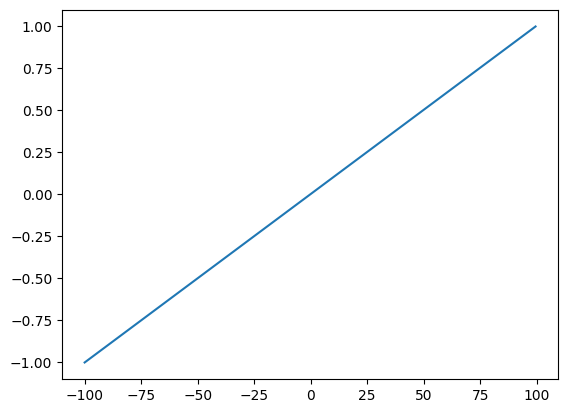

In [ ]:
sequence = np.arange(-100.0, 100, 0.5)
new_sequence = (2 * (sequence - sequence.min()) / 
        (sequence.max() - sequence.min()) - 1)

plt.plot(sequence, new_sequence)
plt.show()


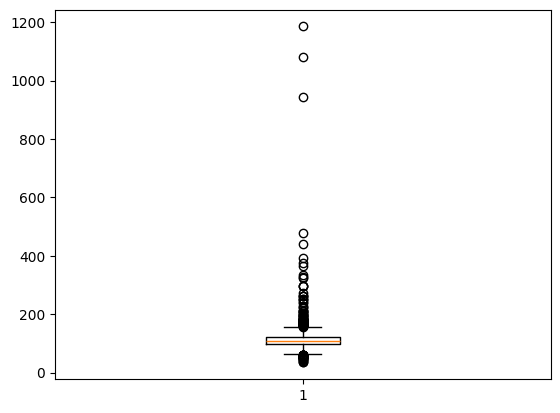

In [22]:
plt.boxplot(x = gdp['2021'])
plt.show()